## Import Libraries

In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from math import sqrt
from xgboost import XGBRegressor, plot_importance
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.svm import SVR

import shap

## Importing dataset

In [83]:
df = pd.read_csv('train_dataset.csv')

## Exploratory Data Analysis

In [84]:
df.drop('id', inplace=True, axis=1)
df.shape

(75757, 63)

In [85]:
df.columns = df.columns.str.lower()

In [86]:
df.head()

,year_factor,state_factor,building_class,facility_type,floor_area,year_built,energy_star_rating,elevation,january_min_temp,january_avg_temp,...,days_below_0f,days_above_80f,days_above_90f,days_above_100f,days_above_110f,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.5,...,0,14,0,0,0,1.0,1.0,1.0,NaN,248.682615
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.5,...,0,14,0,0,0,1.0,NaN,1.0,12.0,26.500150
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.5,...,0,14,0,0,0,1.0,NaN,1.0,12.0,24.693619
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.5,...,0,14,0,0,0,1.0,NaN,1.0,12.0,48.406926
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.5,...,0,14,0,0,0,1.0,1.0,1.0,NaN,3.899395


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75757 entries, 0 to 75756
Data columns (total 63 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   year_factor                75757 non-null  int64  
 1   state_factor               75757 non-null  object 
 2   building_class             75757 non-null  object 
 3   facility_type              75757 non-null  object 
 4   floor_area                 75757 non-null  float64
 5   year_built                 73920 non-null  float64
 6   energy_star_rating         49048 non-null  float64
 7   elevation                  75757 non-null  float64
 8   january_min_temp           75757 non-null  int64  
 9   january_avg_temp           75757 non-null  float64
 10  january_max_temp           75757 non-null  int64  
 11  february_min_temp          75757 non-null  int64  
 12  february_avg_temp          75757 non-null  float64
 13  february_max_temp          75757 non-null  int

In [88]:
df.dtypes.value_counts()

int64      36
float64    24
object      3
dtype: int64

In [89]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year_factor,75757.0,4.367755,1.471441,1.000000,3.000000,5.000000,6.000000,6.000000e+00
floor_area,75757.0,165983.865858,246875.790940,943.000000,62379.000000,91367.000000,166000.000000,6.385382e+06
year_built,73920.0,1952.306764,37.053619,0.000000,1927.000000,1951.000000,1977.000000,2.015000e+03
energy_star_rating,49048.0,61.048605,28.663683,0.000000,40.000000,67.000000,85.000000,1.000000e+02
elevation,75757.0,39.506323,60.656596,-6.400000,11.900000,25.000000,42.700000,1.924500e+03
january_min_temp,75757.0,11.432343,9.381027,-19.000000,6.000000,11.000000,13.000000,4.900000e+01
january_avg_temp,75757.0,34.310468,6.996108,10.806452,29.827586,34.451613,37.322581,6.475806e+01
january_max_temp,75757.0,59.054952,5.355458,42.000000,56.000000,59.000000,62.000000,9.100000e+01
february_min_temp,75757.0,11.720567,12.577272,-13.000000,2.000000,9.000000,20.000000,4.800000e+01
february_avg_temp,75757.0,35.526837,8.866697,13.250000,31.625000,34.107143,40.879310,6.510714e+01


In [90]:
df.describe(include='O').T

,count,unique,top,freq
state_factor,75757,7,State_6,50840
building_class,75757,2,Residential,43558
facility_type,75757,60,Multifamily_Uncategorized,39455


In [91]:
df[['state_factor', 'building_class', 'facility_type']]

,state_factor,building_class,facility_type
0,State_1,Commercial,Grocery_store_or_food_market
1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center
2,State_1,Commercial,Retail_Enclosed_mall
3,State_1,Commercial,Education_Other_classroom
4,State_1,Commercial,Warehouse_Nonrefrigerated
...,...,...,...
75752,State_11,Commercial,Office_Uncategorized
75753,State_11,Residential,5plus_Unit_Building
75754,State_11,Commercial,Commercial_Other
75755,State_11,Commercial,Commercial_Other


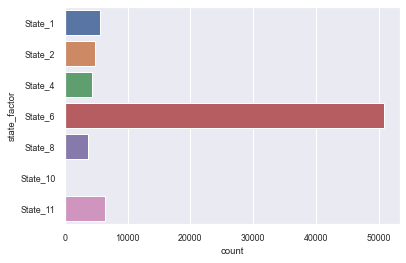

<AxesSubplot:xlabel='count', ylabel='building_class'>

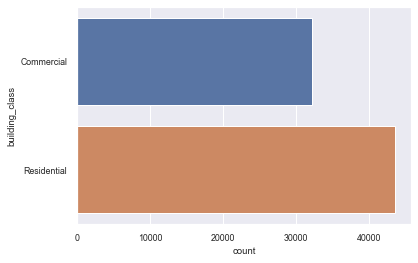

In [92]:
sns.countplot(data=df, y='state_factor')
plt.show()
sns.countplot(data=df, y='building_class')

In [93]:
df['facility_type']

0                     Grocery_store_or_food_market
1        Warehouse_Distribution_or_Shipping_center
2                             Retail_Enclosed_mall
3                        Education_Other_classroom
4                        Warehouse_Nonrefrigerated
                           ...                    
75752                         Office_Uncategorized
75753                          5plus_Unit_Building
75754                             Commercial_Other
75755                             Commercial_Other
75756                           2to4_Unit_Building
Name: facility_type, Length: 75757, dtype: object

<AxesSubplot:>

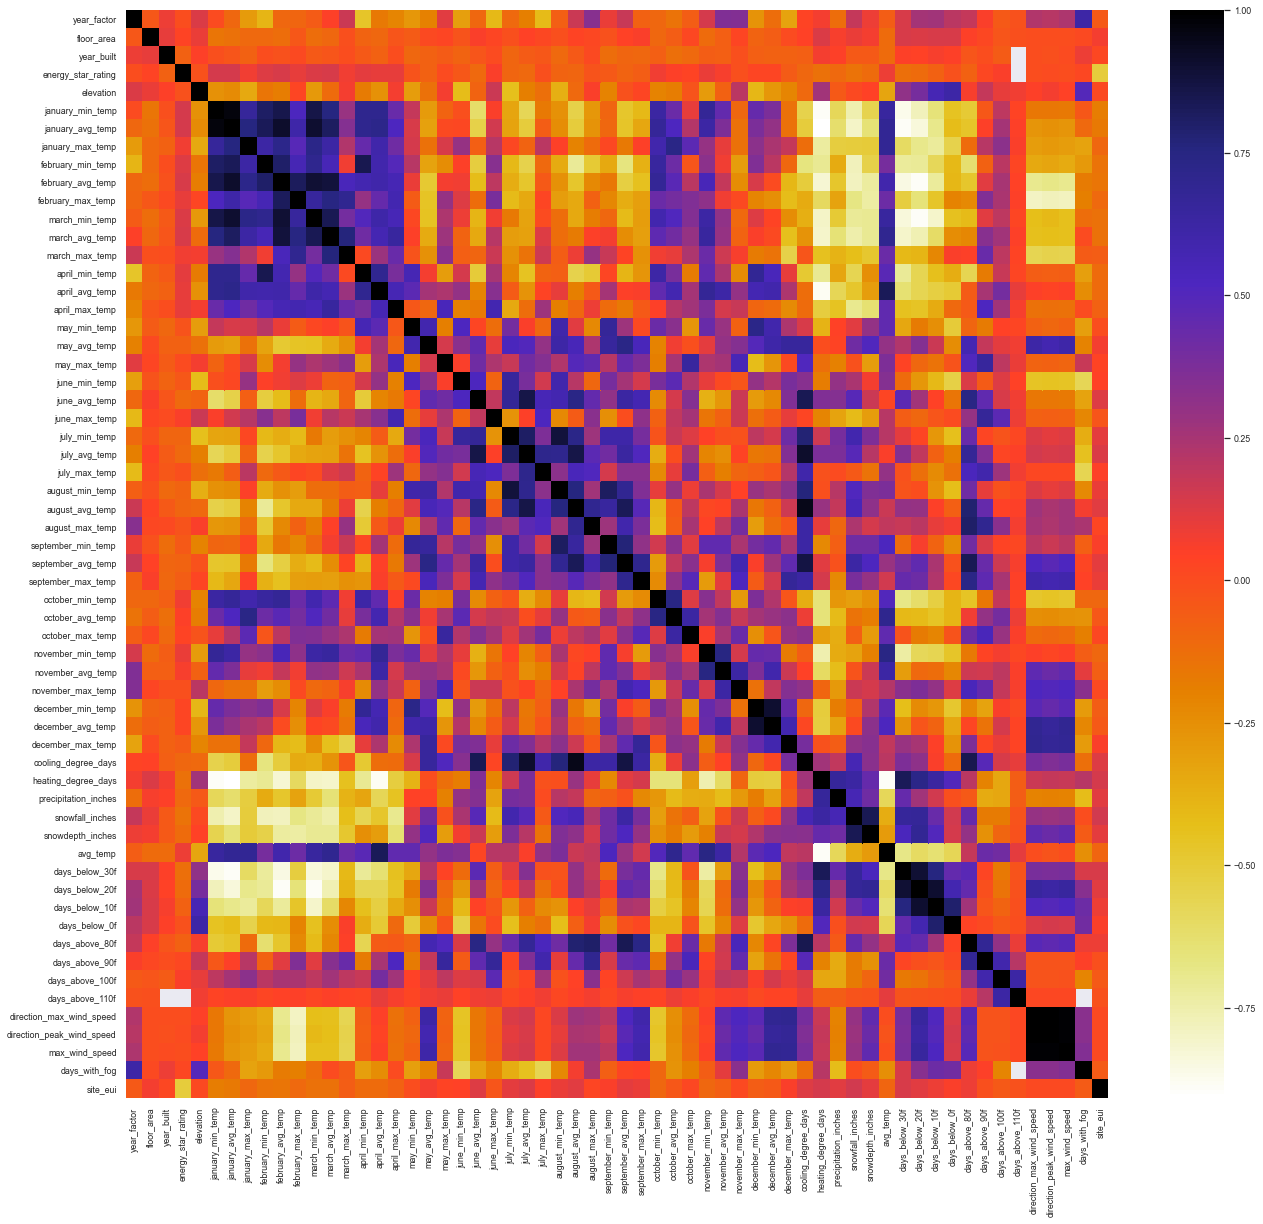

In [94]:
plt.figure(figsize=(22,20))
sns.set(font_scale=0.8)
sns.heatmap(df.drop(['state_factor', 'building_class', 'facility_type'], axis=1).corr(), cmap=plt.cm.CMRmap_r)

In [95]:
df.corr()['site_eui'].sort_values(ascending=False)[1:20]

snowfall_inches         0.157284
heating_degree_days     0.147861
days_below_30f          0.139811
july_avg_temp           0.133856
cooling_degree_days     0.125004
june_avg_temp           0.122019
days_below_20f          0.119492
august_avg_temp         0.113786
precipitation_inches    0.113558
snowdepth_inches        0.113371
september_avg_temp      0.108853
july_min_temp           0.108092
september_max_temp      0.098326
august_min_temp         0.091616
days_above_80f          0.086347
days_below_10f          0.084296
floor_area              0.073967
may_avg_temp            0.072271
days_below_0f           0.060981
Name: site_eui, dtype: float64

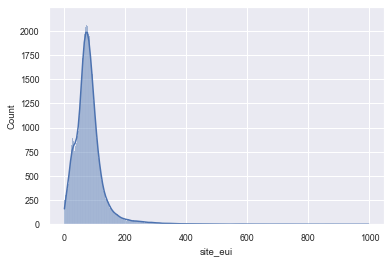

<AxesSubplot:xlabel='site_eui'>

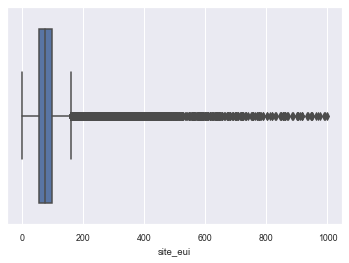

In [96]:
sns.histplot(x=df['site_eui'], kde=True)
plt.show()
sns.boxplot(x=df['site_eui'])

<AxesSubplot:>

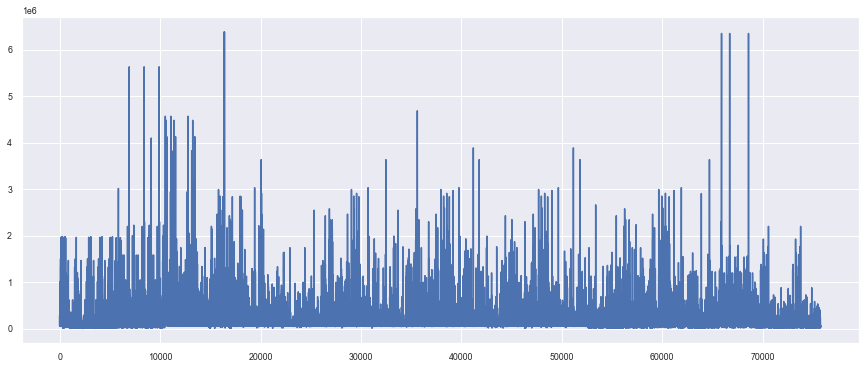

In [97]:
plt.figure(figsize=(15,6))
df['floor_area'].plot()

<AxesSubplot:xlabel='floor_area'>

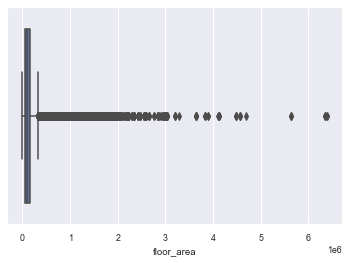

In [98]:
sns.boxplot(x=df['floor_area'])

<AxesSubplot:xlabel='year_built'>

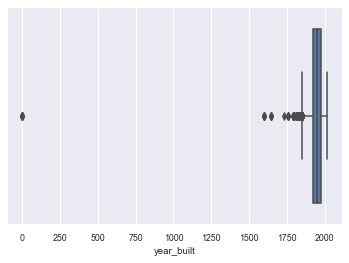

In [99]:
sns.boxplot(x=df['year_built'])

<AxesSubplot:xlabel='elevation'>

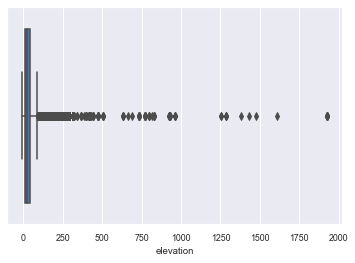

In [100]:
sns.boxplot(x=df['elevation'])

## Preprocessing

In [101]:
df.drop(['days_with_fog', 'max_wind_speed', 'direction_peak_wind_speed', 'direction_max_wind_speed', 'energy_star_rating', 'facility_type'], inplace=True, axis=1)

In [102]:
df['year_built'].fillna(method='ffill', inplace=True)

In [103]:
df.isna().sum()[df.isna().sum() != 0]

Series([], dtype: int64)

In [104]:
ind = df[df['site_eui'] > 200].index
ind.append(df[df['year_built'] < 1750].index)
ind.append(df[df['floor_area'] > 2000000].index)

Int64Index([    0,    13,    24,    25,    26,    57,    58,   112,   113,
              144,
            ...
            61161, 61899, 63888, 64696, 65824, 65900, 66710, 68585, 70574,
            73775],
           dtype='int64', length=2433)

In [105]:
df.drop(df.index[ind], inplace=True)

In [106]:
df.reset_index(inplace=True)
df.drop('index', axis=1, inplace=True)

In [107]:
df['year_built'] = df['year_built'].astype(int)

## Encoding

In [108]:
df[['state_factor', 'building_class']]

,state_factor,building_class
0,State_1,Commercial
1,State_1,Commercial
2,State_1,Commercial
3,State_1,Commercial
4,State_1,Commercial
...,...,...
73493,State_11,Residential
73494,State_11,Commercial
73495,State_11,Residential
73496,State_11,Commercial


In [109]:
df = pd.concat([df.drop('state_factor', axis=1), pd.get_dummies(df['state_factor'], drop_first=True)], axis=1)
df = pd.concat([df.drop('building_class', axis=1), pd.get_dummies(df['building_class'], drop_first=True)], axis=1)

## Baseline Modeling

In [110]:
xgb = XGBRegressor()
xtree = ExtraTreesRegressor()
rf = RandomForestRegressor()
svm = SVR()

In [111]:
X = df.drop('site_eui', axis=1)
y = df['site_eui']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [112]:
def train_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    rmse = sqrt(mse)
    print(f'RMSE is {rmse}')
    print(f'Model score is {model.score(X_train, y_train)}')
    return None

In [113]:
train_model(xgb, X_train, y_train, X_test, y_test)

RMSE is 30.522018446740667
Model score is 0.3547249537130096


In [114]:
# train_model(xtree, X_train, y_train, X_test, y_test)

In [115]:
# train_model(rf, X_train, y_train, X_test, y_test)

In [116]:
# train_model(svm, X_train, y_train, X_test, y_test)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

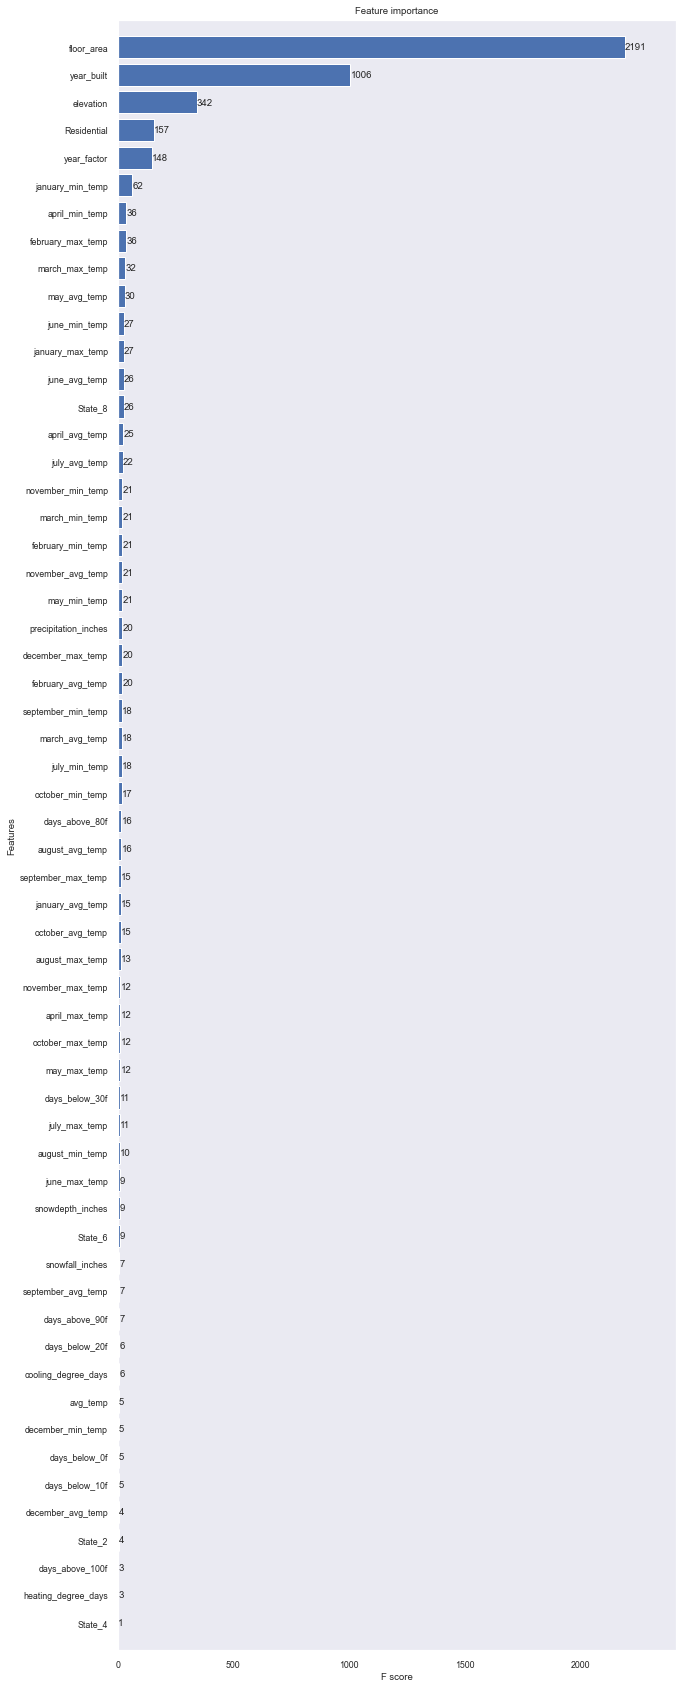

In [117]:
fig, ax = plt.subplots(figsize=(10, 30))
plot_importance(xgb, grid=False, height=0.8, ax=ax)